#### Exploratory Data Analysis of 5G-NIDD Dataset

In [16]:
# This processing is taken from the following link:
# https://www.kaggle.com/code/humera11/5g-nidd/notebook

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [30]:
Combined = pd.read_csv('../dataset/IDS_Dataset.csv')

C:\Users\Satyam Gupta\AppData\Local\Temp\ipykernel_16356\3073188891.py:1: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  Combined = pd.read_csv('../dataset/IDS_Dataset.csv')


In [31]:
Combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1215890 entries, 0 to 1215889
Data columns (total 52 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Unnamed: 0   1215890 non-null  int64  
 1   Seq          1215890 non-null  int64  
 2   Dur          1215890 non-null  float64
 3   RunTime      1215890 non-null  float64
 4   Mean         1215890 non-null  float64
 5   Sum          1215890 non-null  float64
 6   Min          1215890 non-null  float64
 7   Max          1215890 non-null  float64
 8   Proto        1215890 non-null  object 
 9   sTos         1215676 non-null  float64
 10  dTos         272823 non-null   float64
 11  sDSb         1215676 non-null  object 
 12  dDSb         272823 non-null   object 
 13  sTtl         1215676 non-null  float64
 14  dTtl         272823 non-null   float64
 15  sHops        1215676 non-null  float64
 16  dHops        272823 non-null   float64
 17  Cause        1215890 non-null  object 
 18  To

In [32]:
object_columns =  Combined.select_dtypes(include=[object]).columns
float_columns = Combined.select_dtypes(include=[float]).columns
int_columns = Combined.select_dtypes(include=[int]).columns

In [33]:
# columns with null values

columns_null = []
columns = Combined.columns
for column in columns:
    c = Combined[column].isnull().sum()
    if c != 0:
        print(column, 'has {} null values'.format(c))
        columns_null.append(column)

sTos has 214 null values
dTos has 943067 null values
sDSb has 214 null values
dDSb has 943067 null values
sTtl has 214 null values
dTtl has 943067 null values
sHops has 214 null values
dHops has 943067 null values
SrcGap has 937219 null values
DstGap has 937219 null values
SrcWin has 973470 null values
DstWin has 1038812 null values
sVid has 1101319 null values
dVid has 1213881 null values
SrcTCPBase has 937219 null values
DstTCPBase has 985843 null values


##### Processing of Features that have null values

In [34]:
# sTos has 214 null values     ---- dropped
# dTos has 943067 null values  ---- dropped
# sDSb has 214 null values     ---- dropped
# dDSb has 943067 null values  ---- dropped
# sTtl has 214 null values     ---- fillna(0.0)
# dTtl has 943067 null values  ---- fillna(0.0)
# sHops has 214 null values    ---- fillna(99)
# dHops has 943067 null values ---- fillna(99)
# SrcGap has 937219 null values ---- dropped
# DstGap has 937219 null values ---- dropped
# SrcWin has 973470 null values ---- fillna(median)
# DstWin has 1038812 null values --- fillna(median)
# sVid has 1101319 null values  ---- fillna(99)
# dVid has 1213881 null values  ---- fillna(99)
# SrcTCPBase has 937219 null values ---- fillna(median)
# DstTCPBase has 985843 null values ---- fillna(median)

In [35]:
Combined_Benign = Combined[Combined['Label'] == 'Benign']
Combined_Malicious = Combined[Combined['Label'] == 'Malicious']
Combined_ICMPFlood = Combined[Combined['Attack Type'] == 'ICMPFlood']
Combined_HTTPFlood = Combined[Combined['Attack Type'] == 'HTTPFlood']
Combined_SlowrateDoS = Combined[Combined['Attack Type'] == 'SlowrateDoS']
Combined_SYNFlood = Combined[Combined['Attack Type'] == 'SYNFlood']
Combined_SYNScan = Combined[Combined['Attack Type'] == 'SYNScan']
Combined_TCPConnectScan = Combined[Combined['Attack Type'] == 'TCPConnectScan']
Combined_UDPFlood = Combined[Combined['Attack Type'] == 'UDPFlood']
Combined_UDPScan = Combined[Combined['Attack Type'] == 'UDPScan']

print('Total Benign: ',len(Combined_Benign))
print('Total Malicious: ',len(Combined_Malicious))
print('Total ICMPFlood: ',len(Combined_ICMPFlood))
print('Total HTTPFlood: ',len(Combined_HTTPFlood))
print('Total SlowrateDos: ',len(Combined_SlowrateDoS))
print('Total SYNFlood: ',len(Combined_SYNFlood))
print('Total SYNScan: ',len(Combined_SYNScan))
print('Total TCPConnectScan: ',len(Combined_TCPConnectScan))
print('Total UDPFlood: ',len(Combined_UDPFlood))
print('Total UDPScan: ',len(Combined_UDPScan))

print('Benign Percentage in Total Traffic: ',(len(Combined_Benign)/len(Combined)*100))
print('Malicious Percentage in Total Traffic: ',(len(Combined_Malicious)/len(Combined)*100))
print('ICMPFlood Percentage in Malicious Traffic: ',(len(Combined_ICMPFlood)/len(Combined_Malicious)*100))
print('HTTPFlood Percentage in Malicious Traffic: ',(len(Combined_HTTPFlood)/len(Combined_Malicious)*100))
print('SlowrateDos Percentage in Malicious Traffic: ',(len(Combined_SlowrateDoS)/len(Combined_Malicious)*100))
print('SYNFlood Percentage in Malicious Traffic: ',(len(Combined_SYNFlood)/len(Combined_Malicious)*100))
print('SYNScan Percentage in Malicious Traffic: ',(len(Combined_SYNScan)/len(Combined_Malicious)*100))
print('TCPConnectScan Percentage in Malicious Traffic: ',(len(Combined_TCPConnectScan)/len(Combined_Malicious)*100))
print('UDPFlood Percentage in Malicious Traffic: ',(len(Combined_UDPFlood)/len(Combined_Malicious)*100))
print('UDPScan Percentage in Malicious Traffic: ',(len(Combined_UDPScan)/len(Combined_Malicious)*100))

Total Benign:  477737
Total Malicious:  738153
Total ICMPFlood:  1155
Total HTTPFlood:  140812
Total SlowrateDos:  73124
Total SYNFlood:  9721
Total SYNScan:  20043
Total TCPConnectScan:  20052
Total UDPFlood:  457340
Total UDPScan:  15906
Benign Percentage in Total Traffic:  39.29113653373249
Malicious Percentage in Total Traffic:  60.7088634662675
ICMPFlood Percentage in Malicious Traffic:  0.15647162580115503
HTTPFlood Percentage in Malicious Traffic:  19.07626196736991
SlowrateDos Percentage in Malicious Traffic:  9.906347329076763
SYNFlood Percentage in Malicious Traffic:  1.3169356488424486
SYNScan Percentage in Malicious Traffic:  2.7152907324091347
TCPConnectScan Percentage in Malicious Traffic:  2.7165099918309616
UDPFlood Percentage in Malicious Traffic:  61.95734488649373
UDPScan Percentage in Malicious Traffic:  2.1548378181759067


##### Processing of float Features

In [36]:
# float column names

# ['Dur', 'RunTime', 'Mean', 'Sum', 'Min', 'Max', 'sTos', 'dTos', 'sTtl',
#   'dTtl', 'sHops', 'dHops', 'sMeanPktSz', 'dMeanPktSz', 'Load', 'SrcLoad',
#   'DstLoad', 'pLoss', 'SrcGap', 'DstGap', 'Rate', 'SrcRate', 'DstRate',
#   'SrcWin', 'DstWin', 'sVid', 'dVid', 'SrcTCPBase', 'DstTCPBase',
#   'TcpRtt', 'SynAck', 'AckDat']


# ----------------------------

# sTos, dTos - dropped
# sTtl, dTtl - fillna(0.0)
# sHops, dHops - fillna(99)
# SrcGap, DstGap - dropped
# SrcWin, DstWin - fillna(median)
# sVid, dVid - dropped
# SrcTCPBase, DstTCPBase - fillna(99)
# Dur, RunTime, Mean, Sum, Min, Max - dropped
# Rate, SrcRate, DestRate
# sMeanPktSz, dMeanPktSz
# Load, SrcLoad, DstLoad
# pLoss
# TcpRtt, SynAck, AckDat

C:\Users\Satyam Gupta\AppData\Local\Temp\ipykernel_16356\3447204115.py:5: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(ax=ax[i], data=temp, x=j)
C:\Users\Satyam Gupta\AppData\Local\Temp\ipykernel_16356\3447204115.py:5: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(ax=ax[i], data=temp, x=j)


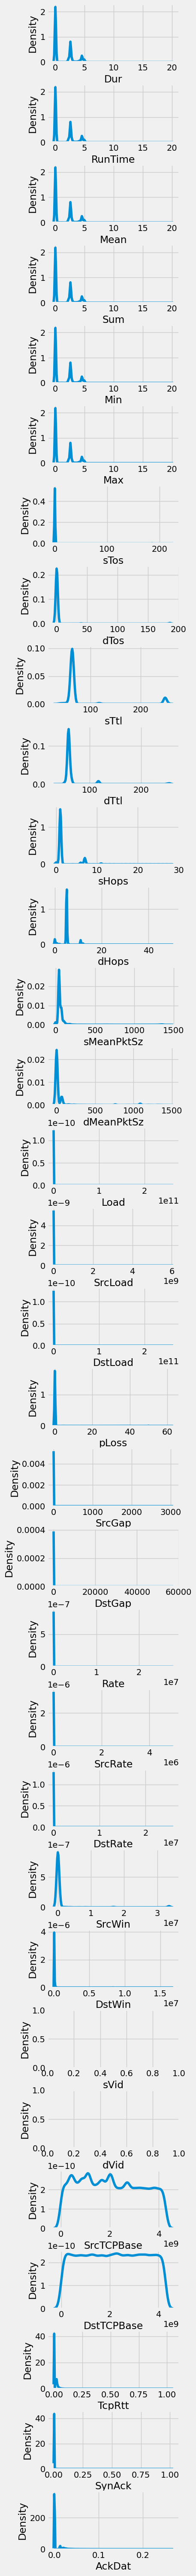

In [37]:
temp = Combined[float_columns]
fig, ax = plt.subplots(32, 1, figsize=(4, 60))
fig.tight_layout()
for i, j in enumerate (float_columns):
    sns.kdeplot(ax=ax[i], data=temp, x=j)
plt.show()

##### BOX PLOT

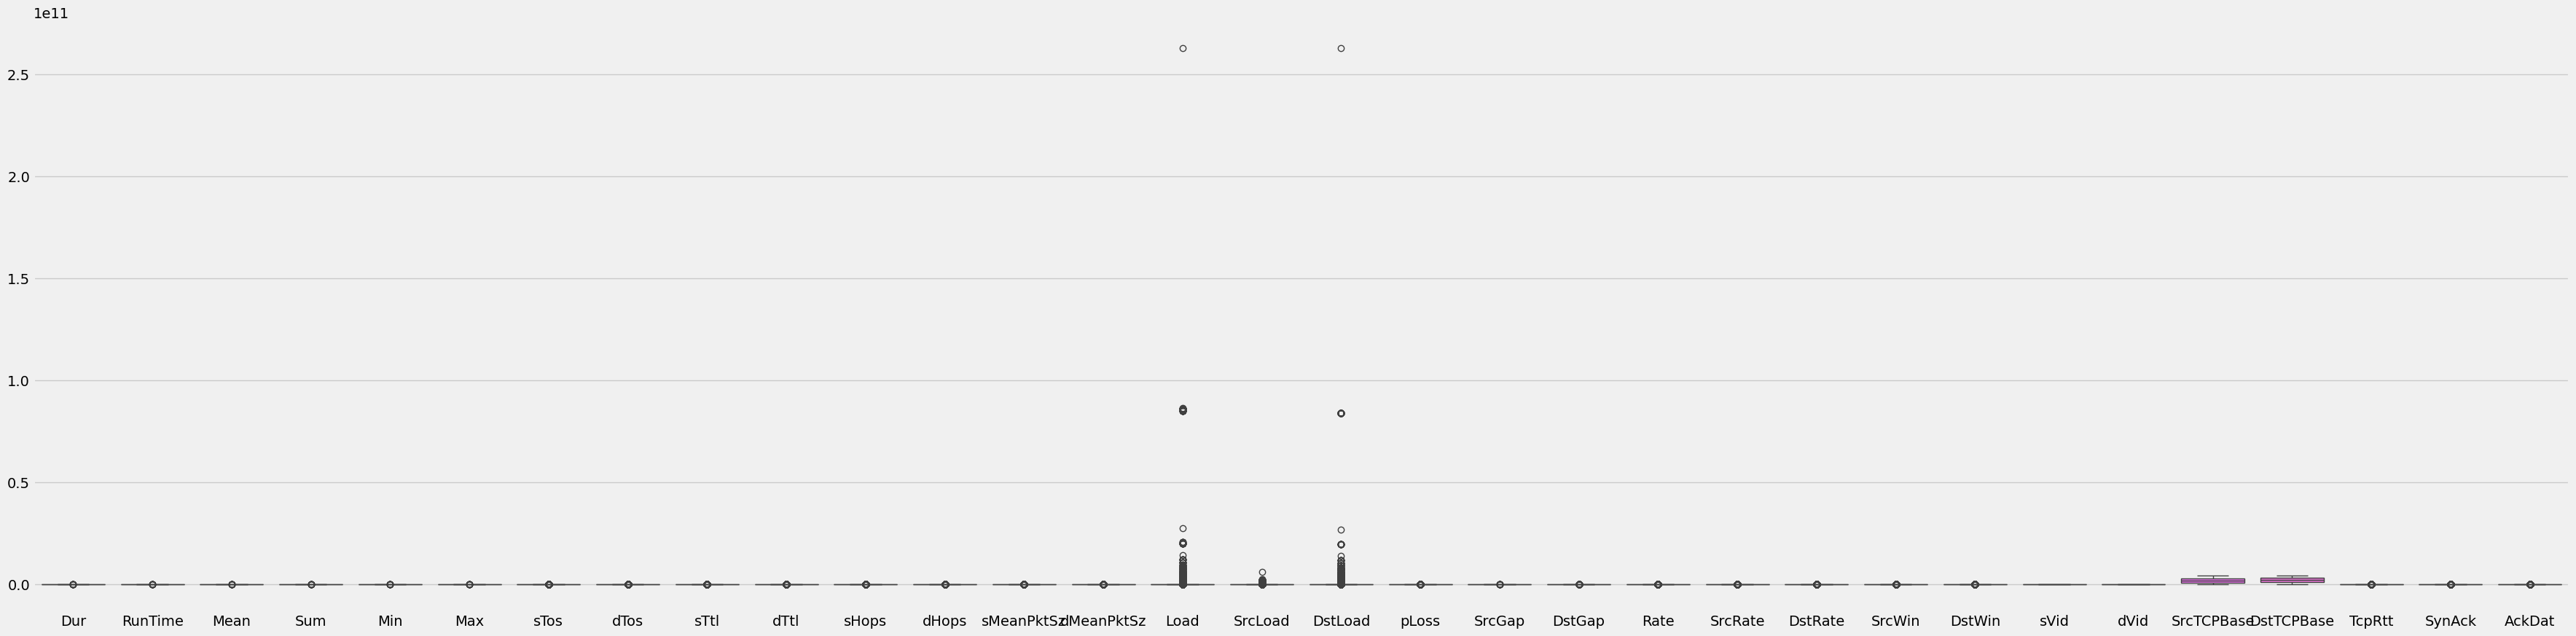

In [38]:
fig = plt.figure(figsize=(40, 10))
sns.boxplot(data=Combined[float_columns])
plt.show()

In [39]:
# Dur, RunTime, Mean, Sum, Min, Max

temp1 = Combined[['Dur', 'RunTime', 'Mean', 'Sum', 'Min', 'Max']]
temp1.columns = ['Dur', 'RunTime', 'Mean', 'Sum', 'Min', 'Max']            
print(temp1.cov())
Combined.drop(columns=['RunTime', 'Mean', 'Sum', 'Min', 'Max'], inplace=True)

              Dur   RunTime      Mean       Sum       Min       Max
Dur      2.860478  2.860478  2.860478  2.860478  2.860478  2.860478
RunTime  2.860478  2.860478  2.860478  2.860478  2.860478  2.860478
Mean     2.860478  2.860478  2.860478  2.860478  2.860478  2.860478
Sum      2.860478  2.860478  2.860478  2.860478  2.860478  2.860478
Min      2.860478  2.860478  2.860478  2.860478  2.860478  2.860478
Max      2.860478  2.860478  2.860478  2.860478  2.860478  2.860478


In [40]:
# sTos, dTos

print('Null:', Combined['sTos'].isnull().sum())
print('Not Null:', Combined['sTos'].notnull().sum())
print('------------------------------------------')
temp1 = Combined[['Label', 'Attack Type', 'sTos']]
print(temp1.groupby(['Label', 'Attack Type']).value_counts())
Combined.replace({'sTos':[16.0, 40.0, 48.0, 128.0, 136.0, 157.0, 186.0, 192.0, 208.0, 216.0, 224.0]}, 
                         0.0, inplace=True)
Combined['sTos_'] = Combined['sTos'].fillna(0.0)
print('------------------------------------------')
print('Null:', Combined['dTos'].isnull().sum())
print('Not Null:', Combined['dTos'].notnull().sum())
temp1 = Combined[['Label', 'Attack Type', 'dTos']]
print('------------------------------------------')
print(temp1.groupby(['Label', 'Attack Type']).value_counts())

Combined.replace({'dTos':[32.0, 40.0, 48.0, 128.0, 184.0, 186.0]}, 0.0, inplace=True)
Combined['dTos_'] = Combined['sTos'].fillna(0.0)

Combined.drop(columns=['sTos', 'dTos'], inplace=True)

Null: 214
Not Null: 1215676
------------------------------------------
Label      Attack Type     sTos 
Benign     Benign          0.0      471063
                           186.0      3538
                           40.0        789
                           192.0       640
                           224.0       528
                           136.0       515
                           208.0       144
                           48.0        137
                           128.0        93
                           16.0         74
                           157.0         1
                           216.0         1
Malicious  HTTPFlood       0.0      140812
           ICMPFlood       0.0        1155
           SYNFlood        0.0        9721
           SYNScan         0.0       20043
           SlowrateDoS     0.0       73124
           TCPConnectScan  0.0       20052
           UDPFlood        0.0      457340
           UDPScan         0.0       15906
Name: count, dtype: int64
----------

In [41]:
# sTtl, dTtl

print('Null:', Combined['sTtl'].isnull().sum())
print('Not Null:', Combined['sTtl'].notnull().sum())
print('------------------------------------------')
temp1 = Combined[['Label', 'Attack Type', 'sTtl']]
print(temp1.groupby(['Label', 'Attack Type']).value_counts())

Combined['sTtl']=Combined['sTtl'].where(~(Combined['Attack Type'] == 'SYNScan'), 48)
Combined['sTtl']=Combined['sTtl'].where(~(Combined['Attack Type'] == 'UDPScan'), 44)

Combined['sTtl']=Combined['sTtl'].replace([36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 45.0, 
                          46.0, 47.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 
                          55.0, 56.0, 57.0, 58.0, 62.0, 114.0, 115.0, 116.0, 128.0, 
                          255], 63.0)
temp1 = Combined[['Label', 'Attack Type', 'sTtl']]
print('------------------------------------------')
print(temp1.groupby(['Label', 'Attack Type']).value_counts())

Combined['sTtl_'] = Combined['sTtl'].fillna(0.0)


print('------------------------------------------')
print('Null:', Combined['dTtl'].isnull().sum())
print('Not Null:', Combined['dTtl'].notnull().sum())

temp1 = Combined[['Label', 'Attack Type', 'dTtl']]
print('------------------------------------------')
print(temp1.groupby(['Label', 'Attack Type']).value_counts())


Combined['dTtl']=Combined['dTtl'].replace([37.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 
                          48.0, 49.0, 50.0, 51.0, 54.0, 78.0, 95.0, 114.0, 
                          115.0, 116.0, 211.0, 228.0, 230.0, 233.0, 236.0, 252.0], 
                         64.0)
temp1 = Combined[['Label', 'Attack Type', 'dTtl']]
print('------------------------------------------')
print(temp1.groupby(['Label', 'Attack Type']).value_counts())

Combined['dTtl_'] = Combined['dTtl'].fillna(0.0)

Combined.drop(columns=['sTtl', 'dTtl'], inplace=True)

Null: 214
Not Null: 1215676
------------------------------------------
Label      Attack Type     sTtl 
Benign     Benign          63.0     281728
                           249.0    111726
                           64.0      31687
                           58.0      27639
                           117.0     13722
                           255.0      5304
                           252.0      1529
                           250.0      1317
                           116.0       608
                           53.0        579
                           52.0        563
                           62.0        461
                           115.0       356
                           47.0        204
                           114.0        65
                           128.0        26
                           50.0          3
                           36.0          2
                           46.0          1
                           49.0          1
                           51.0     

In [42]:
# sHops, dHops

print('Null:', Combined['sHops'].isnull().sum())
print('Not Null:', Combined['sHops'].notnull().sum())
print('------------------------------------------')
temp1 = Combined[['Label', 'Attack Type', 'sHops']]
print(temp1.groupby(['Label', 'Attack Type']).value_counts())

Combined['sHops']=Combined['sHops'].where(~(Combined['Attack Type'] == 'TCPConnectScan'), 1.0)
temp1 = Combined[['Label', 'Attack Type', 'sHops']]
print('------------------------------------------')
print(temp1.groupby(['Label', 'Attack Type']).value_counts())

Combined['sHops']=Combined['sHops'].fillna(99)
print('Null:', Combined['sHops'].isnull().sum())
print('Not Null:', Combined['sHops'].notnull().sum())



print('------------------------------------------')
print('Null:', Combined['dHops'].isnull().sum())
print('Not Null:', Combined['dHops'].notnull().sum())
print('------------------------------------------')
temp1 = Combined[['Label', 'Attack Type', 'dHops']]
print(temp1.groupby(['Label', 'Attack Type']).value_counts())

print('------------------------------------------')
Combined['dHops']=Combined['dHops'].replace([4.0, 10.0, 13.0, 14.0, 15.0, 
                           16.0, 17.0, 18.0, 19.0, 20.0, 
                           21.0, 22.0, 23.0, 26.0, 27.0, 
                           28.0, 33.0, 45.0, 50.0], 0.0)
temp1 = Combined[['Label', 'Attack Type', 'dHops']]
print(temp1.groupby(['Label', 'Attack Type']).value_counts())

Combined['dHops'].fillna(99, inplace=True)
print('------------------------------------------')
print('Null:', Combined['dHops'].isnull().sum())
print('Not Null:', Combined['dHops'].notnull().sum())

Null: 214
Not Null: 1215676
------------------------------------------
Label      Attack Type     sHops
Benign     Benign          1.0      287032
                           7.0      111726
                           0.0       31713
                           6.0       28956
                           11.0      14301
                           4.0        1529
                           12.0       1171
                           2.0         461
                           13.0        357
                           17.0        204
                           14.0         68
                           28.0          2
                           10.0          1
                           15.0          1
                           18.0          1
Malicious  HTTPFlood       1.0      140812
           ICMPFlood       1.0        1155
           SYNFlood        1.0        6855
                           0.0        2866
           SYNScan         27.0        924
                           13.0     

C:\Users\Satyam Gupta\AppData\Local\Temp\ipykernel_16356\901609049.py:35: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  Combined['dHops'].fillna(99, inplace=True)


In [43]:
# sMeanPktSz, dMeanPktSz

temp1 = Combined[['sMeanPktSz', 'dMeanPktSz']]
temp1.columns = ['sMeanPktSz', 'dMeanPktSz']            
print(temp1.cov())
temp1.describe()

              sMeanPktSz    dMeanPktSz
sMeanPktSz  21218.763366   8078.156852
dMeanPktSz   8078.156852  46259.732558


,sMeanPktSz,dMeanPktSz
count,1.215890e+06,1.215890e+06
mean,7.401253e+01,6.189247e+01
std,1.456666e+02,2.150808e+02
min,0.000000e+00,0.000000e+00
25%,4.200000e+01,0.000000e+00
50%,4.200000e+01,0.000000e+00
75%,6.700000e+01,0.000000e+00
max,1.467000e+03,1.478000e+03


In [44]:
# Load, SrcLoad, DstLoad

temp1 = Combined[['Load', 'SrcLoad', 'DstLoad']]
temp1.columns = ['Load', 'SrcLoad', 'DstLoad']            
print(temp1.cov())
temp1.describe()

                 Load       SrcLoad       DstLoad
Load     3.535228e+17  6.018491e+15  3.476186e+17
SrcLoad  6.018491e+15  1.711462e+14  5.847575e+15
DstLoad  3.476186e+17  5.847575e+15  3.418852e+17


,Load,SrcLoad,DstLoad
count,1.215890e+06,1.215890e+06,1.215890e+06
mean,4.928977e+06,1.394168e+05,4.789994e+06
std,5.945779e+08,1.308229e+07,5.847095e+08
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.305190e+02,1.304927e+02,0.000000e+00
max,2.630000e+11,6.072000e+09,2.630000e+11


In [45]:
# pLoss, TcpRtt, SynAck, AckDat

Combined[['pLoss', 'TcpRtt', 'SynAck', 'AckDat']].describe()

,pLoss,TcpRtt,SynAck,AckDat
count,1.215890e+06,1.215890e+06,1.215890e+06,1.215890e+06
mean,3.494910e-01,4.669759e-03,5.816065e-04,4.088152e-03
std,3.672013e+00,1.742817e-02,1.305568e-02,1.053588e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,6.250000e+01,1.051236e+00,1.024680e+00,2.667290e-01


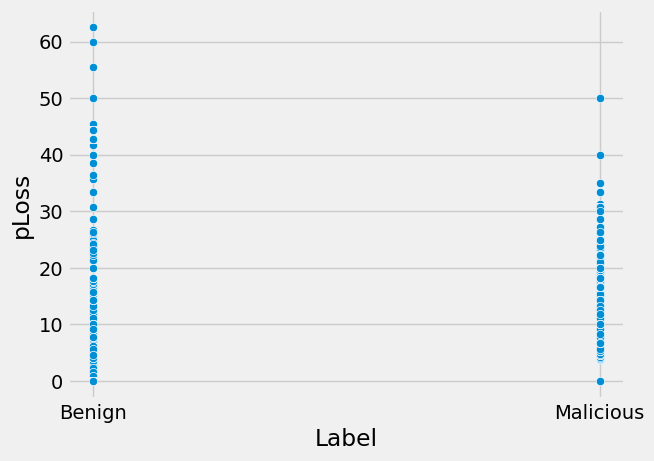

In [46]:
sns.scatterplot(data=Combined, x='Label', y='pLoss')
plt.show()

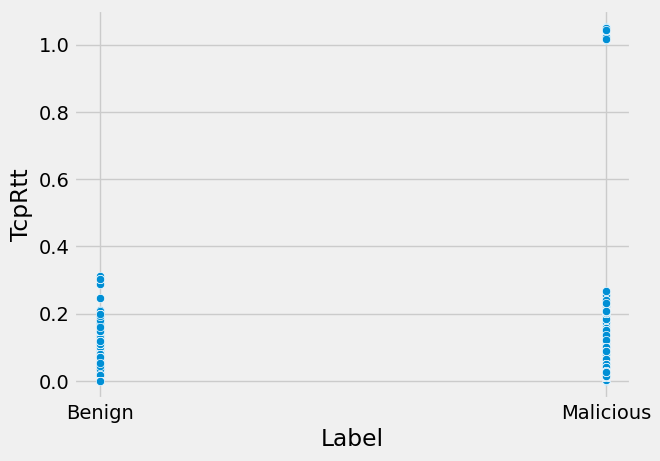

In [47]:
sns.scatterplot(data=Combined, x='Label', y='TcpRtt')
plt.show()

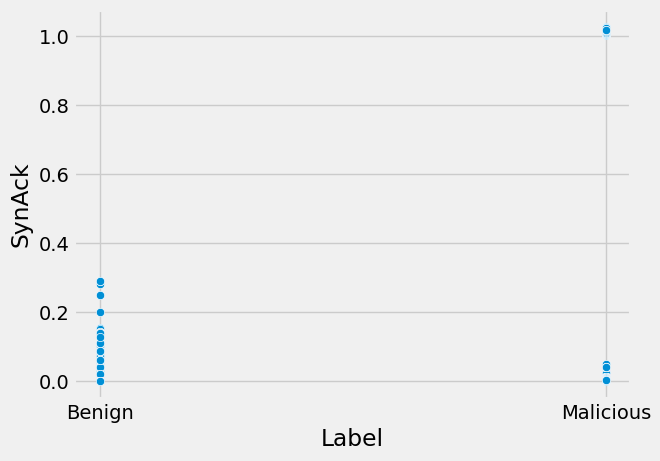

In [48]:
sns.scatterplot(data=Combined, x='Label', y='SynAck')
plt.show()

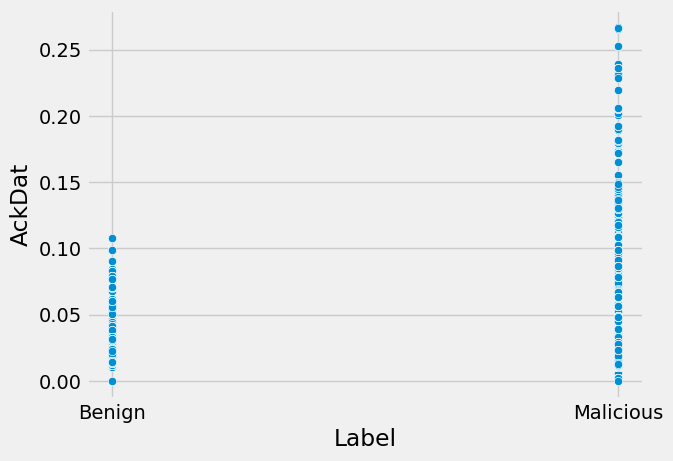

In [49]:
sns.scatterplot(data=Combined, x='Label', y='AckDat')
plt.show()

In [50]:
# SrcGap, DstGap

print('Null:', Combined['SrcGap'].isnull().sum())
print('Not Null:', Combined['SrcGap'].notnull().sum())

temp1 = Combined[['Label', 'Attack Type', 'SrcGap']]
print(temp1.groupby(['Label', 'Attack Type']).value_counts())

Combined['SrcGap']=Combined['SrcGap'].where(~(Combined['Attack Type'] == 'Benign'), 0.0)

temp1 = Combined[['Label', 'Attack Type', 'SrcGap']]
print(temp1.groupby(['Label', 'Attack Type']).value_counts())


print('------------------------------------------------')

print('Null:', Combined['DstGap'].isnull().sum())
print('Not Null:', Combined['DstGap'].notnull().sum())

temp1 = Combined[['Label', 'Attack Type', 'DstGap']]
print(temp1.groupby(['Label', 'Attack Type']).value_counts())

Combined['DstGap']=Combined['DstGap'].where(~(Combined['Attack Type'] == 'Benign'), 0.0)
Combined['DstGap']=Combined['DstGap'].where(~(Combined['Attack Type'] == 'HTTPFlood'), 0.0)

temp1 = Combined[['Label', 'Attack Type', 'DstGap']]
print(temp1.groupby(['Label', 'Attack Type']).value_counts())


Combined.drop(columns=['SrcGap', 'DstGap'], inplace=True)

Null: 937219
Not Null: 278671
Label      Attack Type     SrcGap
Benign     Benign          0.0        14897
                           1.0            6
                           535.0          2
                           3064.0         2
                           80.0           1
                           96.0           1
                           99.0           1
                           131.0          1
                           145.0          1
                           534.0          1
                           536.0          1
                           560.0          1
                           798.0          1
                           1833.0         1
                           2555.0         1
Malicious  HTTPFlood       0.0       140812
           SYNFlood        0.0         9721
           SYNScan         0.0        20023
           SlowrateDoS     0.0        73124
           TCPConnectScan  0.0        20032
           UDPScan         0.0           41
Name: count,

In [51]:
# Rate, SrcRate, DstRate

temp1 = Combined[['Rate', 'SrcRate', 'DstRate']]
temp1.columns = ['Rate', 'SrcRate', 'DstRate']            
print(temp1.cov())
print('\n\n------------------------------------------\n\n')
temp1.describe()

                 Rate       SrcRate       DstRate
Rate     7.295062e+09  1.796310e+09  4.721631e+09
SrcRate  1.796310e+09  5.003973e+08  1.106322e+09
DstRate  4.721631e+09  1.106322e+09  3.200537e+09


------------------------------------------




,Rate,SrcRate,DstRate
count,1.215890e+06,1.215890e+06,1.215890e+06
mean,9.341320e+02,2.380105e+02,4.999662e+02
std,8.541114e+04,2.236956e+04,5.657329e+04
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00
75%,3.886120e-01,3.883410e-01,0.000000e+00
max,2.800000e+07,5.000000e+06,2.600000e+07


In [52]:
# SrcWin, DstWin

print('Null:', Combined['SrcWin'].isnull().sum())
print('Not Null:', Combined['SrcWin'].notnull().sum())
median = Combined['SrcWin'].median()
Combined['SrcWin_'] = Combined['SrcWin'].fillna(median)

print('------------------------------------------')

print('Null:', Combined['DstWin'].isnull().sum())
print('Not Null:', Combined['DstWin'].notnull().sum())
median = Combined['DstWin'].median()
Combined['DstWin_'] = Combined['DstWin'].fillna(median)

print('------------------------------------------')

print('Null:', Combined['SrcWin_'].isnull().sum())
print('Not Null:', Combined['SrcWin_'].notnull().sum())

print('------------------------------------------')

print('Null:', Combined['DstWin_'].isnull().sum())
print('Not Null:', Combined['DstWin_'].notnull().sum())


Combined.drop(columns=['SrcWin', 'DstWin'], inplace=True)

Null: 973470
Not Null: 242420
------------------------------------------
Null: 1038812
Not Null: 177078
------------------------------------------
Null: 0
Not Null: 1215890
------------------------------------------
Null: 0
Not Null: 1215890


In [53]:
#sVid, dVid

print(Combined['sVid'].value_counts())
print(Combined['sVid'].isnull().sum())
print('\n')
print(Combined['dVid'].value_counts())
print(Combined['dVid'].isnull().sum())
Combined['sVid_'] = Combined['sVid'].fillna(99)
Combined['dVid_'] = Combined['dVid'].fillna(99)
Combined.drop(columns=['sVid', 'dVid'], inplace=True)

sVid
610.0    114571
Name: count, dtype: int64
1101319


dVid
610.0    2009
Name: count, dtype: int64
1213881


In [54]:
# SrcTCPBase, DstTCPBase

print('Null:', Combined['SrcTCPBase'].isnull().sum())
print('Not Null:', Combined['SrcTCPBase'].notnull().sum())
median = Combined['SrcTCPBase'].median()
Combined['SrcTCPBase_'] = Combined['SrcTCPBase'].fillna(median)
print('------------------------------------------')
print('Null:', Combined['SrcTCPBase_'].isnull().sum())
print('Not Null:', Combined['SrcTCPBase_'].notnull().sum())



print('------------------------------------------')
print('Null:', Combined['DstTCPBase'].isnull().sum())
print('Not Null:', Combined['DstTCPBase'].notnull().sum())
median = Combined['DstTCPBase'].median()
Combined['DstTCPBase_'] = Combined['DstTCPBase'].fillna(median)
print('------------------------------------------')
print('Null:', Combined['DstTCPBase_'].isnull().sum())
print('Not Null:', Combined['DstTCPBase_'].notnull().sum())


Combined.drop(columns=['SrcTCPBase', 'DstTCPBase'], inplace=True)

Null: 937219
Not Null: 278671
------------------------------------------
Null: 0
Not Null: 1215890
------------------------------------------
Null: 985843
Not Null: 230047
------------------------------------------
Null: 0
Not Null: 1215890


##### Processing of int type Features

In [55]:
# int column names

# ['Unnamed: 0', 'Seq', 'TotPkts', 'SrcPkts', 'DstPkts', 'TotBytes',
# 'SrcBytes', 'DstBytes', 'Offset', 'Loss', 'SrcLoss', 'DstLoss']

# --------------------------

# Unnamed: 0 - dropped
# Seq - no processing required
# TotPkts, SrcPkts, DstPkts - no processing required
# TotBytes, SrcBytes, DstBytes - no processing required
# Offset - no processing required
# Loss, SrcLoss, DstLoss - no processing required

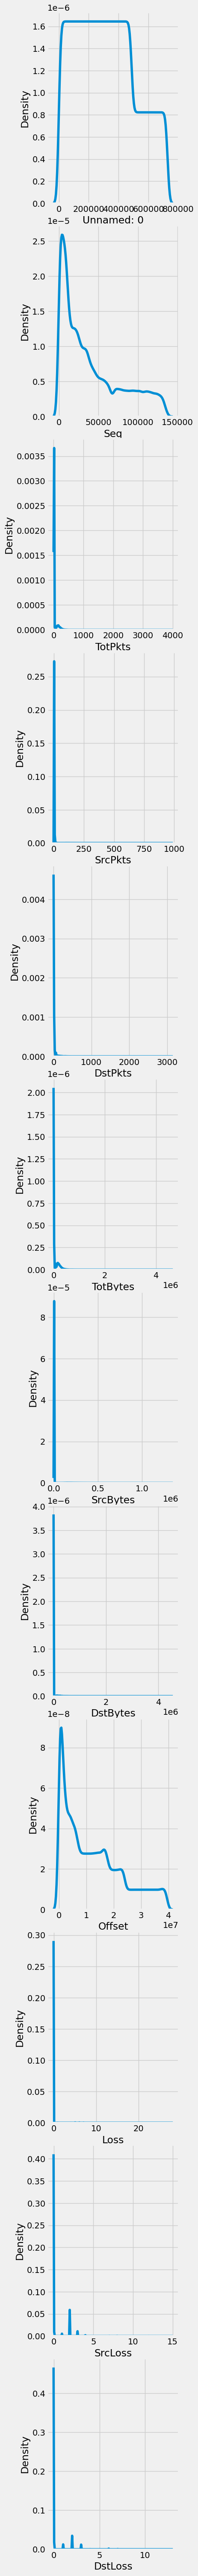

In [56]:
temp = Combined[int_columns]
fig, ax = plt.subplots(12, 1, figsize=(4, 60))
fig.tight_layout()
for i, j in enumerate (int_columns):
    sns.kdeplot(ax=ax[i], data=temp, x=j)
plt.show()

In [57]:
# Unnamed: 0
Combined.drop(columns=['Unnamed: 0'], inplace=True)

##### Object Type Features

In [58]:
# object column names

# ['Proto', 'sDSb', 'dDSb', 'Cause', 'State', 'Label', 'Attack Type',
#  'Attack Tool']


# Proto - OneHotEncoding/get_dummies()
# sDSb, dDSb - dropped
# Cause - OneHotEncoding/get_dummies()
# State - OneHotEncoding/get_dummies()
# Label - OneHotEncoding/get_dummies()
# Attack Type - .replace()
# Attack Tool - dropped

In [59]:
# Proto

temp1 = Combined[['Label', 'Attack Type', 'Proto']]
print(temp1.groupby(['Label', 'Attack Type', 'Proto']).value_counts(ascending=True))


print('\n\n------------------------------------------\n\n')
Combined['Proto']=Combined['Proto'].replace(['ipv6-icmp', 'arp', 'llc', 'lldp', 'sctp'], 'icmp')
temp1 = Combined[['Label', 'Attack Type', 'Proto']]
print(temp1.groupby(['Label', 'Attack Type', 'Proto']).value_counts(ascending=True))


Label      Attack Type     Proto    
Benign     Benign          arp              41
                           icmp          28425
                           ipv6-icmp         2
                           llc              58
                           lldp            115
                           sctp           4327
                           tcp           14918
                           udp          429851
Malicious  HTTPFlood       tcp          140812
           ICMPFlood       icmp           1155
           SYNFlood        tcp            9721
           SYNScan         icmp             20
                           tcp           20023
           SlowrateDoS     tcp           73124
           TCPConnectScan  icmp             20
                           tcp           20032
           UDPFlood        udp          457340
           UDPScan         icmp             16
                           tcp              41
                           udp           15849
Name: count, dtype: int

In [60]:
# sDSb, dDSb

print('Null:', Combined['sDSb'].isnull().sum())
print('Not Null:', Combined['sDSb'].notnull().sum())
temp1 = Combined[['Label', 'Attack Type', 'sDSb']]
print(temp1.groupby(['Label', 'Attack Type']).value_counts())

Combined['sDSb']=Combined['sDSb'].replace(['ef', 'af11', 'cs6', 'cs7', 'af41', '52', 'af12', 'cs4', '4', '54', '39'], 
                         'cs0')
print('------------------------------------------')
print(Combined['sDSb'].value_counts())
Combined.drop(columns=['sDSb'], inplace=True)
print('------------------------------------------')

print('Null:', Combined['dDSb'].isnull().sum())
print('Not Null:', Combined['dDSb'].notnull().sum())
temp1 = Combined[['Label', 'Attack Type', 'dDSb']]
print('------------------------------------------')
print(temp1.groupby(['Label', 'Attack Type']).value_counts())

Combined['dDSb']=Combined['dDSb'].replace(['ef', 'af11', 'af12', 'cs1', 'cs4'], 'cs0')
print(Combined['dDSb'].value_counts())
Combined.drop(columns=['dDSb'], inplace=True)

Null: 214
Not Null: 1215676
Label      Attack Type     sDSb
Benign     Benign          cs0     471063
                           ef        3538
                           af11       789
                           cs6        640
                           cs7        528
                           af41       515
                           52         144
                           af12       137
                           cs4         93
                           4           74
                           39           1
                           54           1
Malicious  HTTPFlood       cs0     140812
           ICMPFlood       cs0       1155
           SYNFlood        cs0       9721
           SYNScan         cs0      20043
           SlowrateDoS     cs0      73124
           TCPConnectScan  cs0      20052
           UDPFlood        cs0     457340
           UDPScan         cs0      15906
Name: count, dtype: int64
------------------------------------------
sDSb
cs0    1215676
Name: count

In [61]:
# Cause

temp1 = Combined[['Label', 'Attack Type', 'Cause']]
print(temp1.groupby(['Label', 'Attack Type', 'Cause']).value_counts(ascending=True))


print('\n\n------------------------------------------\n\n')
Combined['Cause']=Combined['Cause'].replace(['Shutdown'], 'Start')
temp1 = Combined[['Label', 'Attack Type', 'Cause']]
print(temp1.groupby(['Label', 'Attack Type', 'Cause']).value_counts(ascending=True))


Label      Attack Type     Cause   
Benign     Benign          Shutdown       702
                           Start       221542
                           Status      255493
Malicious  HTTPFlood       Start        46055
                           Status       94757
           ICMPFlood       Start         1155
           SYNFlood        Start         9721
           SYNScan         Start        20043
           SlowrateDoS     Start        20084
                           Status       53040
           TCPConnectScan  Start        20052
           UDPFlood        Start       131965
                           Status      325375
           UDPScan         Start        15906
Name: count, dtype: int64


------------------------------------------


Label      Attack Type     Cause 
Benign     Benign          Start     222244
                           Status    255493
Malicious  HTTPFlood       Start      46055
                           Status     94757
           ICMPFlood       Start     

In [62]:
# State

print(Combined['State'].value_counts(ascending=True))
print('\n\n------------------------------------------\n\n')

temp1 = Combined[['Label', 'Attack Type', 'State']]
print(temp1.groupby(['Label', 'Attack Type', 'State']).value_counts())


print('\n\n------------------------------------------\n\n')
Combined['State']=Combined['State'].replace(['ACC','NRS', 'RSP', 'TST', 'URP'], 'REQ')
temp1 = Combined[['Label', 'Attack Type', 'State']]
print(temp1.groupby(['Label', 'Attack Type', 'State']).value_counts(ascending=True))


State
NRS         2
TST        28
RSP        73
URP       786
ACC      1109
ECO     28822
FIN     59181
RST     75670
CON    132174
INT    328746
REQ    589299
Name: count, dtype: int64


------------------------------------------


Label      Attack Type     State
Benign     Benign          ACC        1109
                           CON       41568
                           ECO       27639
                           FIN        1900
                           INT      180932
                           NRS           2
                           REQ      222655
                           RSP          73
                           RST        1073
                           URP         786
Malicious  HTTPFlood       CON       47268
                           FIN       47508
                           REQ           5
                           RST       46031
           ICMPFlood       ECO        1155
           SYNFlood        REQ        1385
                           RST        8336
   

In [63]:
# Attack Tool

print(Combined['Attack Tool'].value_counts(ascending=True))
print('\n\n------------------------------------------\n\n')

temp1 = Combined[['Label', 'Attack Type', 'Attack Tool']]
print(temp1.groupby(['Label', 'Attack Type', 'Attack Tool']).value_counts())

Combined.drop(columns=['Attack Tool'], inplace=True)

Attack Tool
Slowloris      13254
Nmap           56001
Torshammer     59870
Goldeneye     140812
Hping3        468216
Benign        477737
Name: count, dtype: int64


------------------------------------------


Label      Attack Type     Attack Tool
Benign     Benign          Benign         477737
Malicious  HTTPFlood       Goldeneye      140812
           ICMPFlood       Hping3           1155
           SYNFlood        Hping3           9721
           SYNScan         Nmap            20043
           SlowrateDoS     Slowloris       13254
                           Torshammer      59870
           TCPConnectScan  Nmap            20052
           UDPFlood        Hping3         457340
           UDPScan         Nmap            15906
Name: count, dtype: int64


In [64]:
# changing the place of Label and Attack Type
Combined[['Label_', 'Attack Type_']] = Combined[['Label', 'Attack Type']]
Combined.drop(columns=['Label', 'Attack Type'], inplace=True)

In [65]:
columns = Combined.columns
features_int = []
for column in columns:
    if Combined[column].dtype == 'int':
        features_int.append(column)

print('No. of int type features: ',len(features_int))
print(features_int)
print('\n\n')




features_float = []
for column in columns:
    if Combined[column].dtype == 'float':
        features_float.append(column)

print('No. of float type features: ',len(features_float))
print(features_float)
print('\n\n')




features_object = []
for column in columns:
    if Combined[column].dtype == 'object':
        features_object.append(column)

print('No. of object type features: ',len(features_object))
print(features_object)
print('\n\n')


No. of int type features:  0
[]



No. of float type features:  25
['Dur', 'sHops', 'dHops', 'sMeanPktSz', 'dMeanPktSz', 'Load', 'SrcLoad', 'DstLoad', 'pLoss', 'Rate', 'SrcRate', 'DstRate', 'TcpRtt', 'SynAck', 'AckDat', 'sTos_', 'dTos_', 'sTtl_', 'dTtl_', 'SrcWin_', 'DstWin_', 'sVid_', 'dVid_', 'SrcTCPBase_', 'DstTCPBase_']



No. of object type features:  5
['Proto', 'Cause', 'State', 'Label_', 'Attack Type_']





In [66]:
Combined['Proto'].value_counts()
Combined = pd.get_dummies(Combined, columns=['Proto'], drop_first=False)
Combined.head()

,Seq,Dur,sHops,dHops,Cause,TotPkts,SrcPkts,DstPkts,TotBytes,SrcBytes,DstBytes,Offset,sMeanPktSz,dMeanPktSz,Load,SrcLoad,DstLoad,Loss,SrcLoss,DstLoss,pLoss,Rate,SrcRate,DstRate,State,TcpRtt,SynAck,AckDat,sTos_,dTos_,sTtl_,dTtl_,SrcWin_,DstWin_,sVid_,dVid_,SrcTCPBase_,DstTCPBase_,Label_,Attack Type_,Proto_icmp,Proto_tcp,Proto_udp
0,1,0.000000,6.0,99.0,Start,1,1,0,98,98,0,128,98.000000,0.000000,0.0000,0.0000,0.000000,0,0,0,0.0,0.000000,0.000000,0.000000,ECO,0.0,0.0,0.0,0.0,0.0,63.0,0.0,62592.0,64896.0,99.0,99.0,1.994167e+09,2.151747e+09,Benign,Benign,True,False,False
1,2,0.000000,6.0,99.0,Start,1,1,0,98,98,0,232,98.000000,0.000000,0.0000,0.0000,0.000000,0,0,0,0.0,0.000000,0.000000,0.000000,ECO,0.0,0.0,0.0,0.0,0.0,63.0,0.0,62592.0,64896.0,99.0,99.0,1.994167e+09,2.151747e+09,Benign,Benign,True,False,False
2,3,4.998020,11.0,0.0,Start,214,196,18,249093,244212,4881,336,1245.979614,271.166656,396280.1250,388901.1875,7378.921875,0,0,0,0.0,42.616875,39.015450,3.401347,CON,0.0,0.0,0.0,0.0,0.0,117.0,64.0,62592.0,64896.0,99.0,99.0,1.994167e+09,2.151747e+09,Benign,Benign,False,False,True
3,4,4.998037,11.0,0.0,Start,184,163,21,221712,216245,5467,440,1326.656494,260.333344,352339.9375,344005.4688,8334.472656,0,0,0,0.0,36.614376,32.412727,4.001571,CON,0.0,0.0,0.0,0.0,0.0,117.0,64.0,62592.0,64896.0,99.0,99.0,1.994167e+09,2.151747e+09,Benign,Benign,False,False,True
4,5,4.999453,11.0,0.0,Start,223,204,19,280216,275723,4493,544,1351.583374,236.473679,445855.1563,439043.2188,6811.945312,0,0,0,0.0,44.404858,40.604443,3.600394,CON,0.0,0.0,0.0,0.0,0.0,117.0,64.0,62592.0,64896.0,99.0,99.0,1.994167e+09,2.151747e+09,Benign,Benign,False,False,True


In [67]:
Combined['Cause'].value_counts()
Combined = pd.get_dummies(Combined, columns=['Cause'], drop_first=True)
Combined.head()

,Seq,Dur,sHops,dHops,TotPkts,SrcPkts,DstPkts,TotBytes,SrcBytes,DstBytes,Offset,sMeanPktSz,dMeanPktSz,Load,SrcLoad,DstLoad,Loss,SrcLoss,DstLoss,pLoss,Rate,SrcRate,DstRate,State,TcpRtt,SynAck,AckDat,sTos_,dTos_,sTtl_,dTtl_,SrcWin_,DstWin_,sVid_,dVid_,SrcTCPBase_,DstTCPBase_,Label_,Attack Type_,Proto_icmp,Proto_tcp,Proto_udp,Cause_Status
0,1,0.000000,6.0,99.0,1,1,0,98,98,0,128,98.000000,0.000000,0.0000,0.0000,0.000000,0,0,0,0.0,0.000000,0.000000,0.000000,ECO,0.0,0.0,0.0,0.0,0.0,63.0,0.0,62592.0,64896.0,99.0,99.0,1.994167e+09,2.151747e+09,Benign,Benign,True,False,False,False
1,2,0.000000,6.0,99.0,1,1,0,98,98,0,232,98.000000,0.000000,0.0000,0.0000,0.000000,0,0,0,0.0,0.000000,0.000000,0.000000,ECO,0.0,0.0,0.0,0.0,0.0,63.0,0.0,62592.0,64896.0,99.0,99.0,1.994167e+09,2.151747e+09,Benign,Benign,True,False,False,False
2,3,4.998020,11.0,0.0,214,196,18,249093,244212,4881,336,1245.979614,271.166656,396280.1250,388901.1875,7378.921875,0,0,0,0.0,42.616875,39.015450,3.401347,CON,0.0,0.0,0.0,0.0,0.0,117.0,64.0,62592.0,64896.0,99.0,99.0,1.994167e+09,2.151747e+09,Benign,Benign,False,False,True,False
3,4,4.998037,11.0,0.0,184,163,21,221712,216245,5467,440,1326.656494,260.333344,352339.9375,344005.4688,8334.472656,0,0,0,0.0,36.614376,32.412727,4.001571,CON,0.0,0.0,0.0,0.0,0.0,117.0,64.0,62592.0,64896.0,99.0,99.0,1.994167e+09,2.151747e+09,Benign,Benign,False,False,True,False
4,5,4.999453,11.0,0.0,223,204,19,280216,275723,4493,544,1351.583374,236.473679,445855.1563,439043.2188,6811.945312,0,0,0,0.0,44.404858,40.604443,3.600394,CON,0.0,0.0,0.0,0.0,0.0,117.0,64.0,62592.0,64896.0,99.0,99.0,1.994167e+09,2.151747e+09,Benign,Benign,False,False,True,False


In [68]:
Combined['State'].value_counts()
Combined = pd.get_dummies(Combined, columns=['State'], drop_first=False)
Combined.head()

,Seq,Dur,sHops,dHops,TotPkts,SrcPkts,DstPkts,TotBytes,SrcBytes,DstBytes,Offset,sMeanPktSz,dMeanPktSz,Load,SrcLoad,DstLoad,Loss,SrcLoss,DstLoss,pLoss,Rate,SrcRate,DstRate,TcpRtt,SynAck,AckDat,sTos_,dTos_,sTtl_,dTtl_,SrcWin_,DstWin_,sVid_,dVid_,SrcTCPBase_,DstTCPBase_,Label_,Attack Type_,Proto_icmp,Proto_tcp,Proto_udp,Cause_Status,State_CON,State_ECO,State_FIN,State_INT,State_REQ,State_RST
0,1,0.000000,6.0,99.0,1,1,0,98,98,0,128,98.000000,0.000000,0.0000,0.0000,0.000000,0,0,0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,63.0,0.0,62592.0,64896.0,99.0,99.0,1.994167e+09,2.151747e+09,Benign,Benign,True,False,False,False,False,True,False,False,False,False
1,2,0.000000,6.0,99.0,1,1,0,98,98,0,232,98.000000,0.000000,0.0000,0.0000,0.000000,0,0,0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,63.0,0.0,62592.0,64896.0,99.0,99.0,1.994167e+09,2.151747e+09,Benign,Benign,True,False,False,False,False,True,False,False,False,False
2,3,4.998020,11.0,0.0,214,196,18,249093,244212,4881,336,1245.979614,271.166656,396280.1250,388901.1875,7378.921875,0,0,0,0.0,42.616875,39.015450,3.401347,0.0,0.0,0.0,0.0,0.0,117.0,64.0,62592.0,64896.0,99.0,99.0,1.994167e+09,2.151747e+09,Benign,Benign,False,False,True,False,True,False,False,False,False,False
3,4,4.998037,11.0,0.0,184,163,21,221712,216245,5467,440,1326.656494,260.333344,352339.9375,344005.4688,8334.472656,0,0,0,0.0,36.614376,32.412727,4.001571,0.0,0.0,0.0,0.0,0.0,117.0,64.0,62592.0,64896.0,99.0,99.0,1.994167e+09,2.151747e+09,Benign,Benign,False,False,True,False,True,False,False,False,False,False
4,5,4.999453,11.0,0.0,223,204,19,280216,275723,4493,544,1351.583374,236.473679,445855.1563,439043.2188,6811.945312,0,0,0,0.0,44.404858,40.604443,3.600394,0.0,0.0,0.0,0.0,0.0,117.0,64.0,62592.0,64896.0,99.0,99.0,1.994167e+09,2.151747e+09,Benign,Benign,False,False,True,False,True,False,False,False,False,False


In [69]:
Combined['Label_'].value_counts()
Combined = pd.get_dummies(Combined, columns=['Label_'], drop_first=True)
Combined.head()
Combined['Label__Malicious'].value_counts()

Label__Malicious
True     738153
False    477737
Name: count, dtype: int64

In [44]:
Combined['Attack Type_'].replace(['Benign', 'UDPFlood', 'HTTPFlood', 'SlowrateDoS',
                            'TCPConnectScan', 'SYNScan', 'UDPScan', 'SYNFlood', 'ICMPFlood'], 
                          [0, 1, 2, 3, 4, 5, 6, 7, 8], inplace=True)
Combined['Attack Type_'].value_counts()

Attack Type_
0    477737
1    457340
2    140812
3     73124
4     20052
5     20043
6     15906
7      9721
8      1155
Name: count, dtype: int64

In [70]:
Combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1215890 entries, 0 to 1215889
Data columns (total 48 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Seq               1215890 non-null  int64  
 1   Dur               1215890 non-null  float64
 2   sHops             1215890 non-null  float64
 3   dHops             1215890 non-null  float64
 4   TotPkts           1215890 non-null  int64  
 5   SrcPkts           1215890 non-null  int64  
 6   DstPkts           1215890 non-null  int64  
 7   TotBytes          1215890 non-null  int64  
 8   SrcBytes          1215890 non-null  int64  
 9   DstBytes          1215890 non-null  int64  
 10  Offset            1215890 non-null  int64  
 11  sMeanPktSz        1215890 non-null  float64
 12  dMeanPktSz        1215890 non-null  float64
 13  Load              1215890 non-null  float64
 14  SrcLoad           1215890 non-null  float64
 15  DstLoad           1215890 non-null  float64
 16  

In [72]:
Combined.to_csv('../dataset/IDS_Dataset_processed.csv', encoding='utf-8', index=False)